In [1]:
from qutip import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
wc=1.0*2*np.pi
wa=1.0*2*np.pi
N=20
g=np.linspace(0,2.5,20)*2*np.pi

In [3]:
a=tensor(destroy(N),qeye(2))
sm=tensor(qeye(N),destroy(2))
nc=a.dag()*a
na=sm.dag()*sm

In [4]:
na_expt=np.zeros(len(g))
nc_expt=np.zeros(len(g))

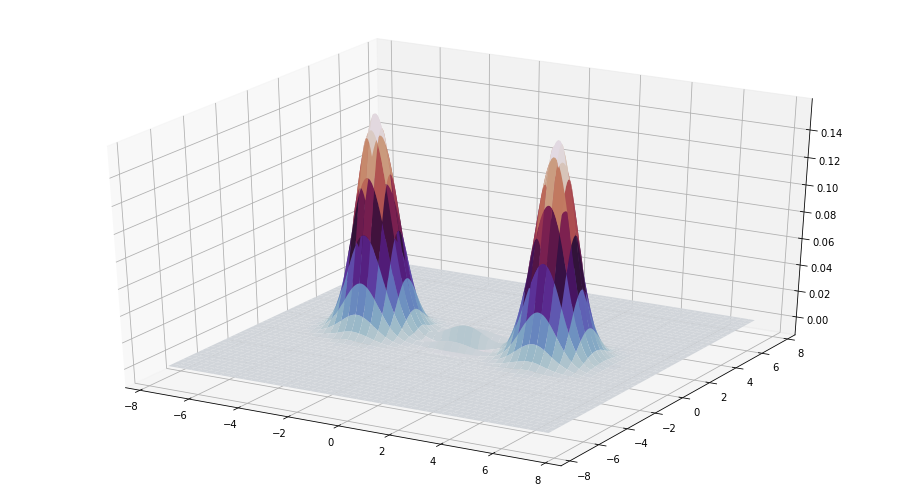

In [5]:

H=wc*nc+wa*na+g[-1]*(a.dag()+a)*(sm+sm.dag())
evals,ekets=H.eigenstates()
psi_gnd=ekets[0]
rho_cavity=ptrace(psi_gnd,0)
xvec=np.linspace(-7.5,7.5,200)
W=wigner(rho_cavity,xvec,xvec)
x,y=np.meshgrid(xvec,xvec)
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,W,cmap='twilight')